# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

<ipython-input-1-5b489f4d910b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
data = pd.read_csv('../dengue_data/Buga.csv')
df = pd.DataFrame(data)
df["FecNot"]=pd.to_datetime(df['FecNot'])
df.sort_values(["FecNot"])
sales = pd.DataFrame(df['FecNot'].value_counts().sort_index())
sales.columns = ['Casos']

In [3]:
sales.head()

,Casos
2010-01-02,4
2010-01-03,7
2010-01-04,3
2010-01-05,2
2010-01-06,1


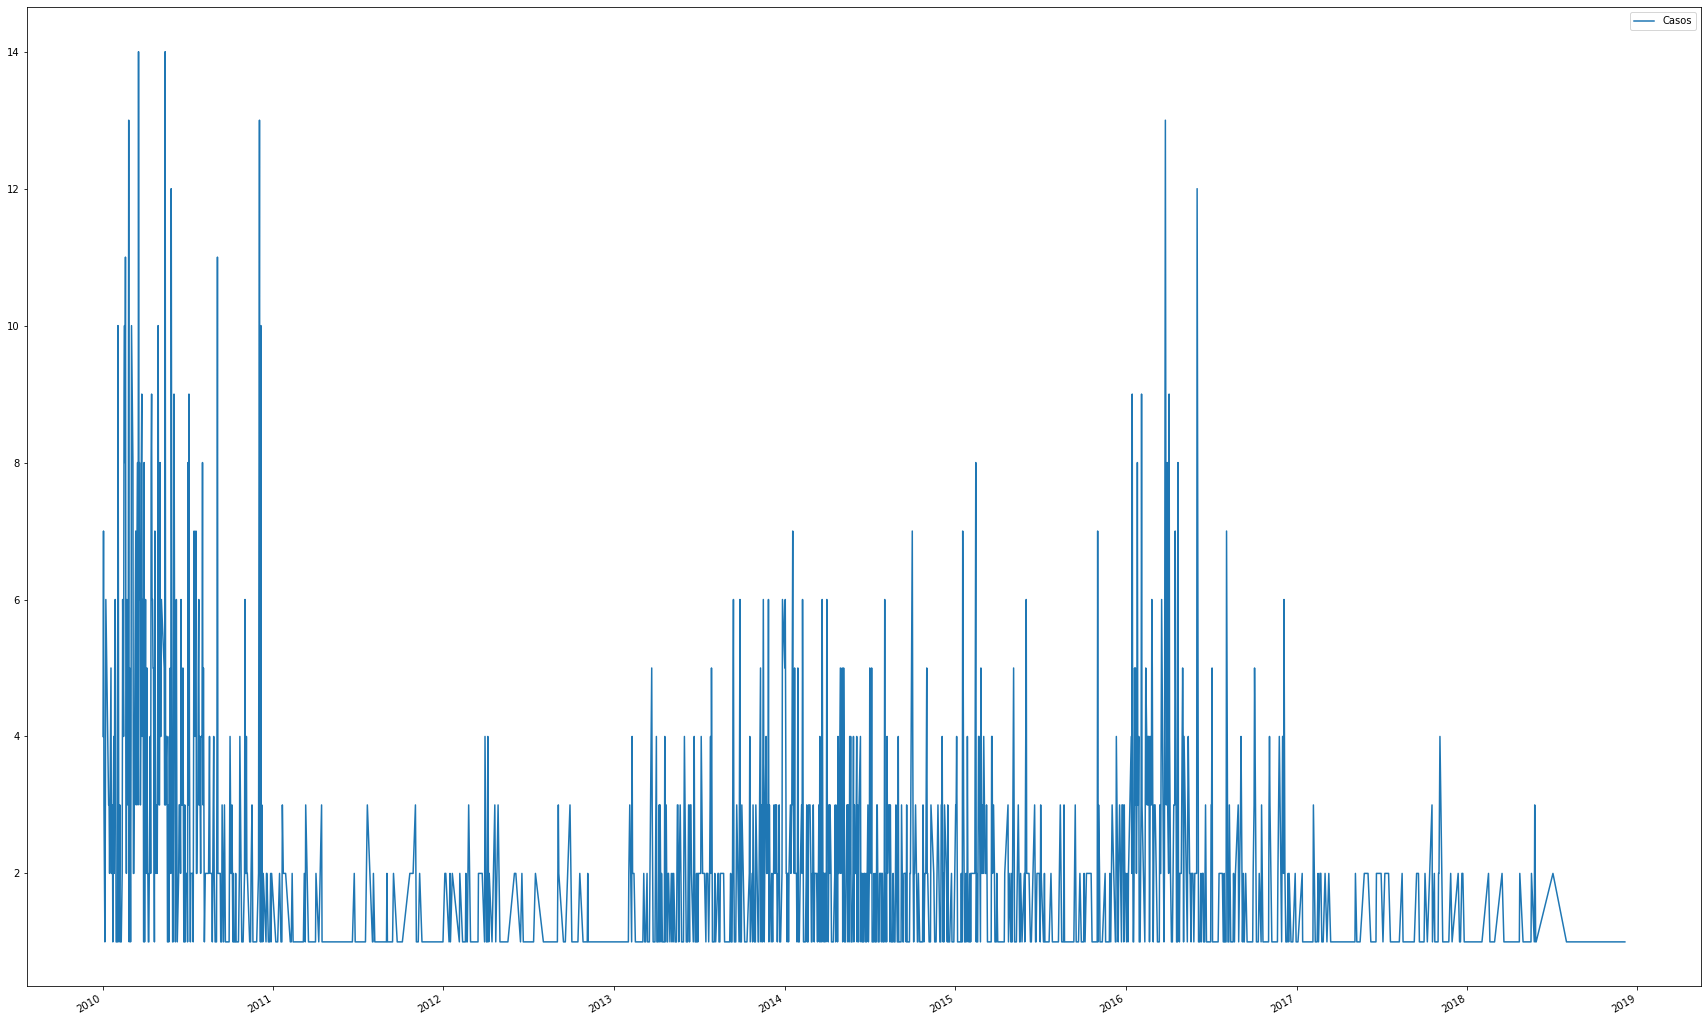

In [4]:
sales.plot(figsize=(30,20))

Stationary means mean, variance and covariance is constant over periods.

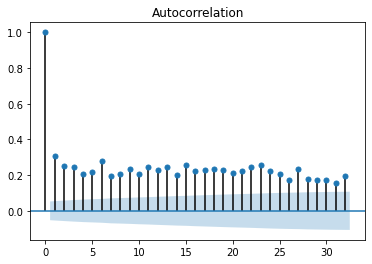

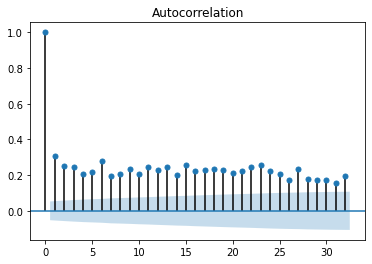

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [6]:
sales.head()

,Casos
2010-01-02,4
2010-01-03,7
2010-01-04,3
2010-01-05,2
2010-01-06,1


In [7]:
sales.shift(1)

,Casos
2010-01-02,NaN
2010-01-03,4.0
2010-01-04,7.0
2010-01-05,3.0
2010-01-06,2.0
...,...
2018-08-04,1.0
2018-10-01,1.0
2018-10-02,1.0
2018-10-03,1.0


In [8]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [9]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Casos
2010-01-03,3.0
2010-01-04,-4.0
2010-01-05,-1.0
2010-01-06,-1.0
2010-01-07,2.0


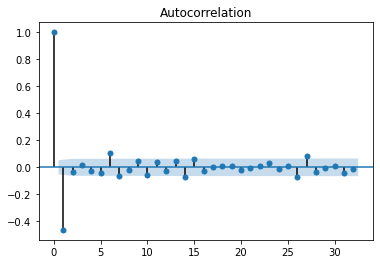

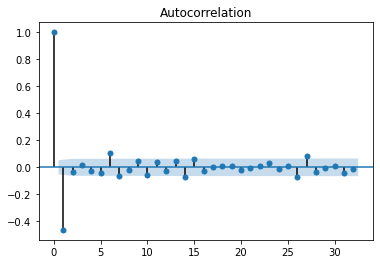

In [10]:
plot_acf(sales_diff)

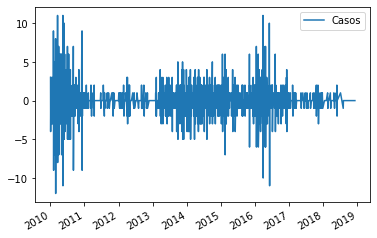

In [11]:
sales_diff.plot()

In [12]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

# Autoreggresive AR Model

In [14]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Future

In [15]:
predictions = model_ar_fit.predict(start=26,end=36)

In [16]:
test

array([[10],
       [ 1],
       [ 2],
       ...,
       [ 1],
       [ 1],
       [ 1]])

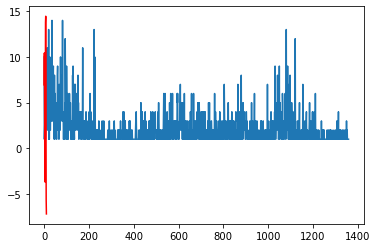

In [17]:
plt.plot(test)
plt.plot(predictions,color='red')

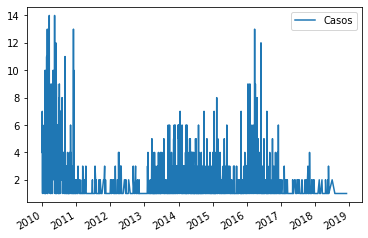

In [18]:
sales.plot()

# ARIMA model

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

LinAlgError: SVD did not converge

In [ ]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    